In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from pandas import Series

# Definindo o tamanho padrão das figuras
rcParams['figure.figsize'] = 20, 10

# Registrando conversores de datas para plotagem
register_matplotlib_converters()

# Importando o módulo de data e hora
from datetime import datetime

# Importando a função ADF (Augmented Dickey-Fuller) para testar estacionariedade
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


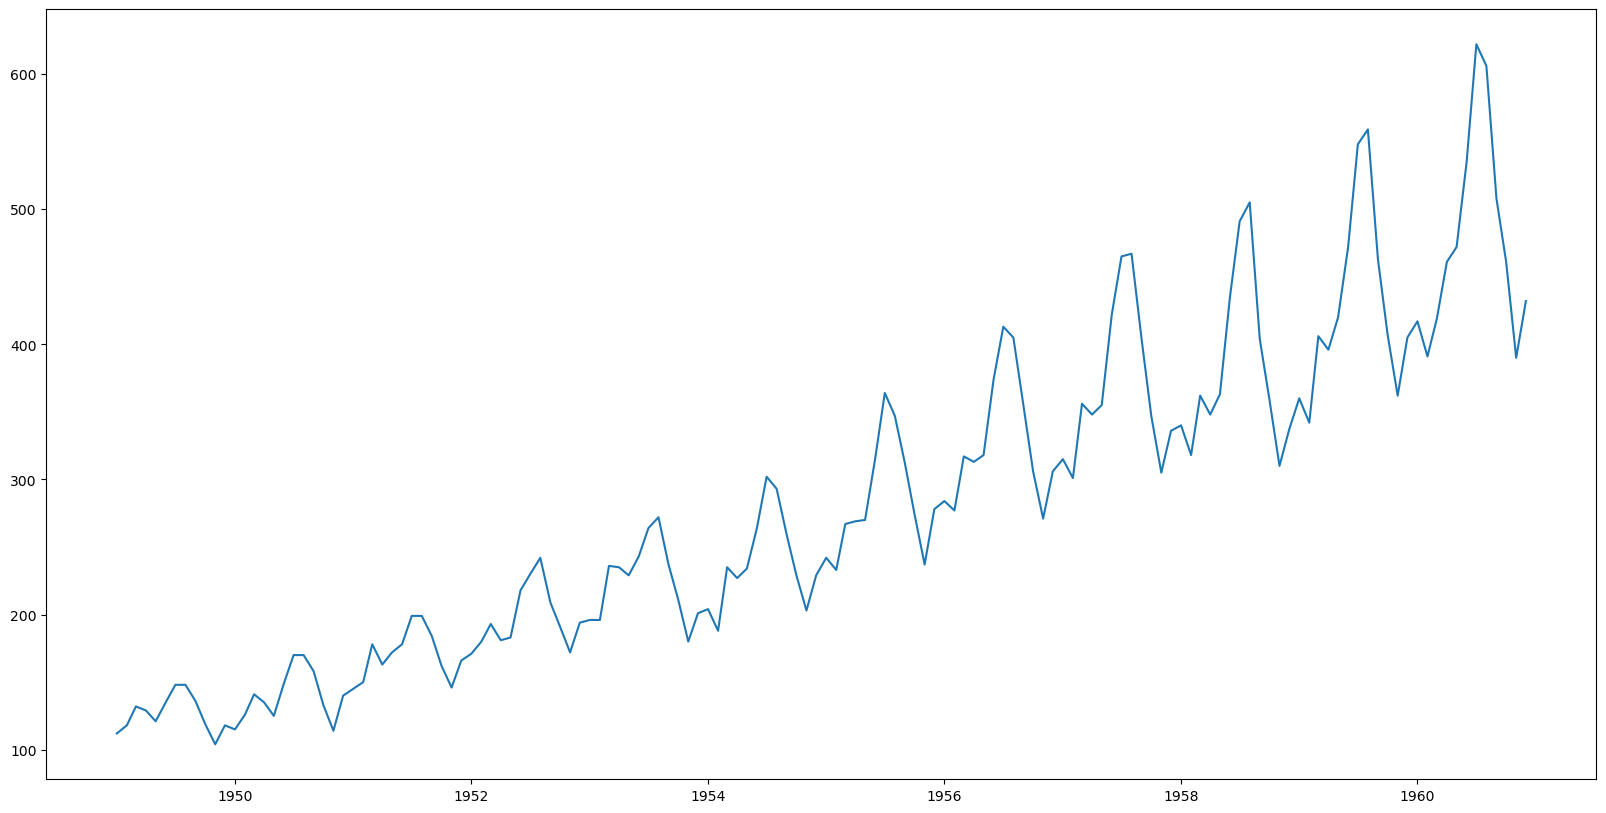

In [3]:
# Calculo do log
calculo = np.log(df)
plt.plot(df)
plt.show()

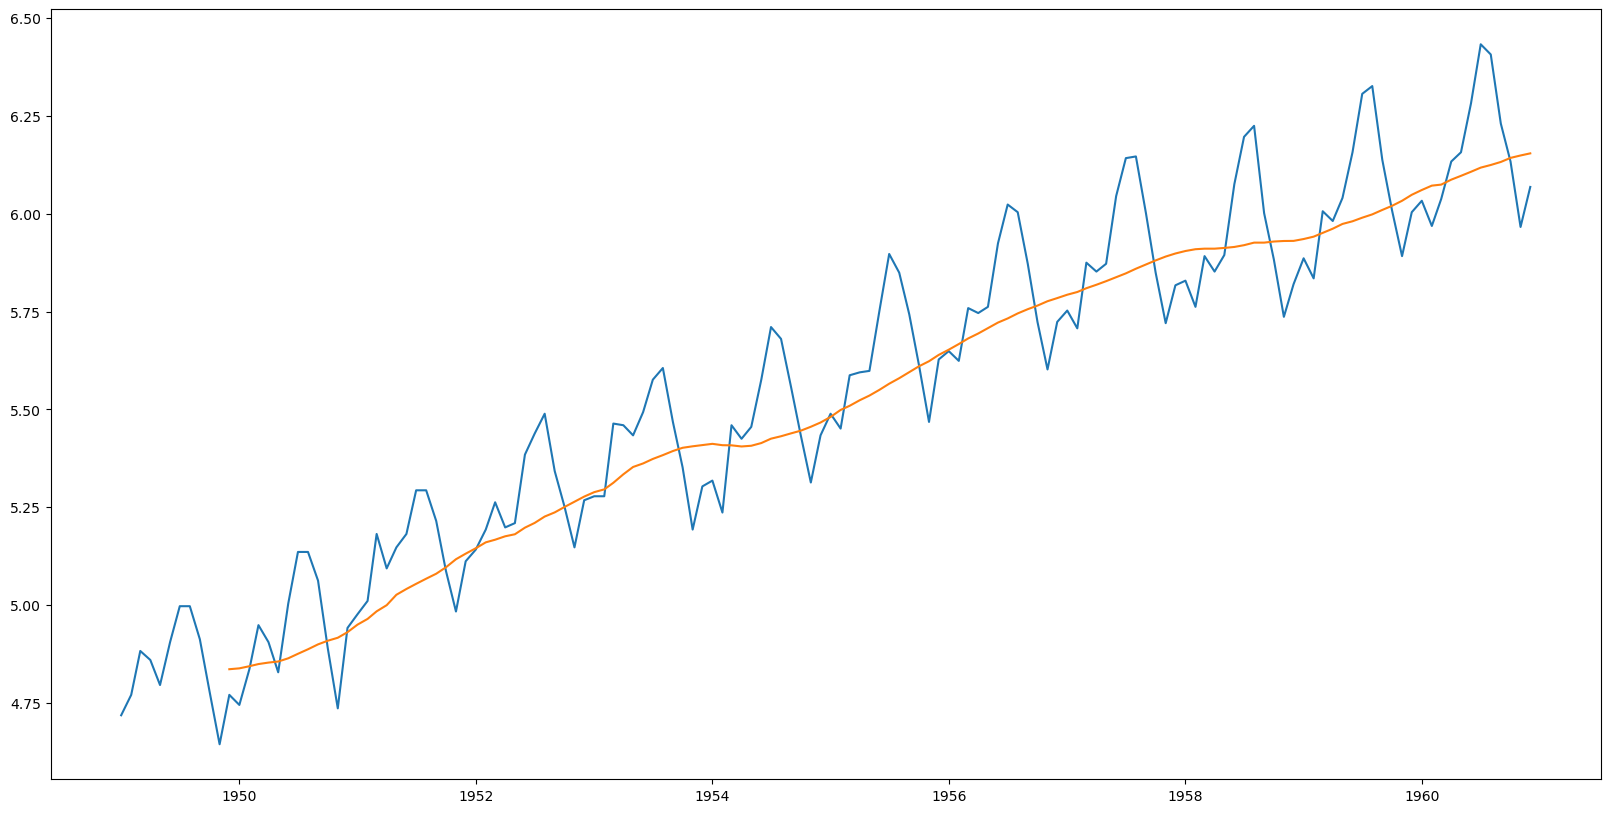

In [5]:
# cálculo da média móvel
média_móvel = calculo.rolling(window=12).mean()
plt.plot(calculo)
plt.plot(média_móvel)
plt.show()

In [6]:
# subtrair dados do log da média móvel (log - média_movel)
resultado = calculo - média_móvel
resultado.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [7]:
resultado.dropna(inplace = True)
resultado.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [10]:
def teste_estacionariedade(y):
    resultado = adfuller(y, autolag = 'AIC')
    print('Resultado do Teste Dickey-Fuller:')
    print('Estatística do Teste:', resultado[0])
    print('Valor do p:', resultado[1])
    print('Valores Críticos:')
    for key, value in resultado[4].items():
        print(f'{key}: {value}')
        
# Chamando a função de teste de estacionariedade
teste_estacionariedade(resultado)

Resultado do Teste Dickey-Fuller:
Estatística do Teste: -3.1629079913008877
Valor do p: 0.022234630001241967
Valores Críticos:
1%: -3.4865346059036564
5%: -2.8861509858476264
10%: -2.579896092790057


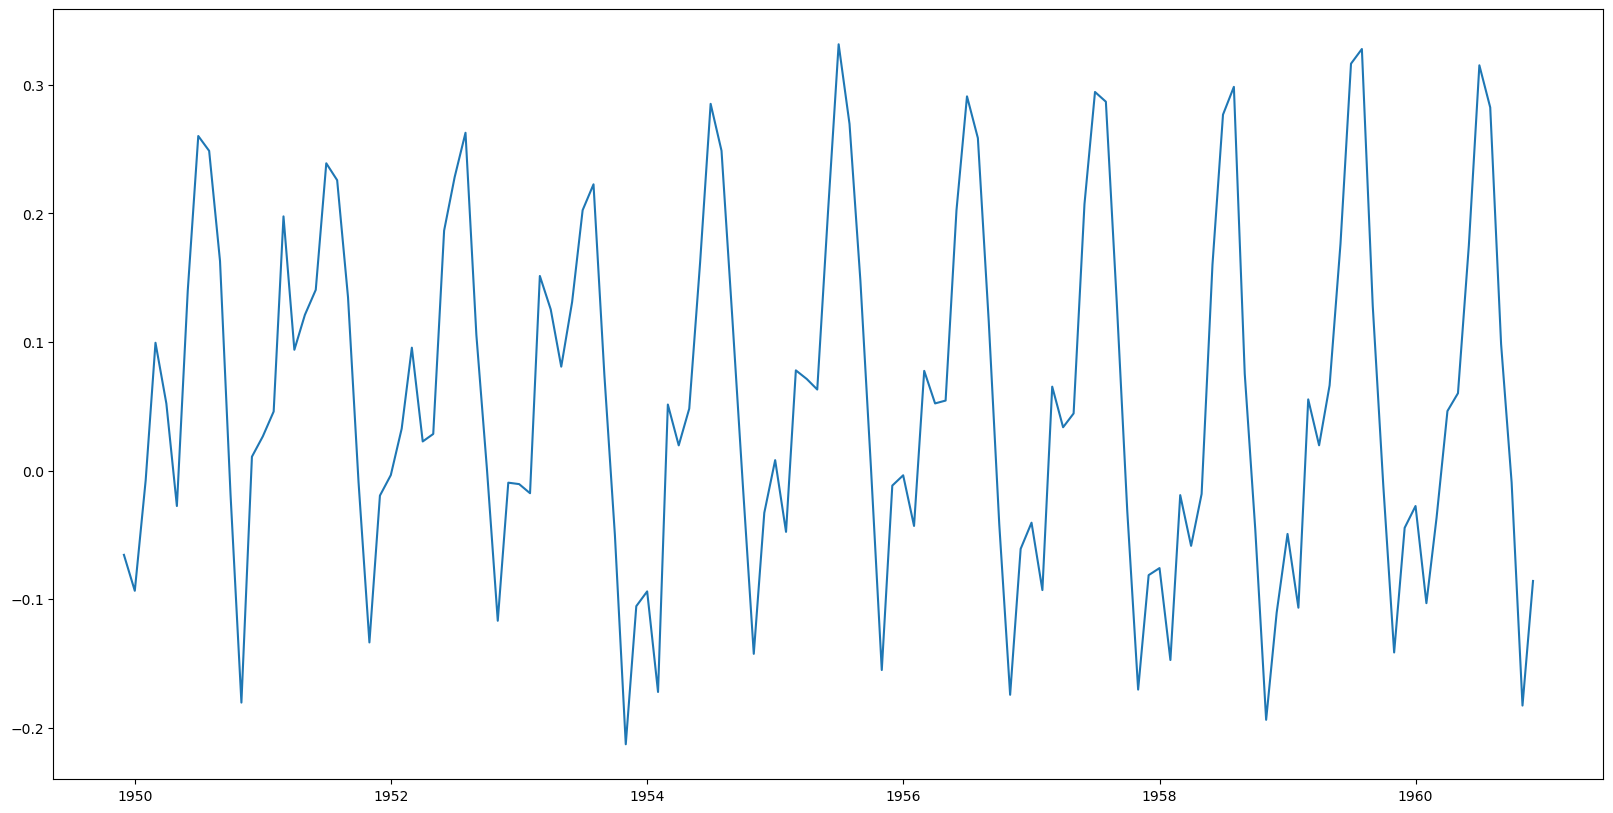

In [11]:
plt.plot(resultado)
plt.show()